In [1]:
import pandas as pd
import numpy as np
import tensorflow 
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score

In [2]:
df = pd.read_csv('musk_csv.csv')

## Exploring the dataset

In [3]:
df.head(10)

# We see the presence of multiple negative values and also a large range from -ve to +ve values

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-138,-156,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-59,-1,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-133,-153,55,144,142,165,-68,-146,37,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [5]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [6]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [7]:
df.isnull().any()

ID                   False
molecule_name        False
conformation_name    False
f1                   False
f2                   False
                     ...  
f163                 False
f164                 False
f165                 False
f166                 False
class                False
Length: 170, dtype: bool

In [8]:
df['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [9]:
# correlation - to check how different features are correlated to eachother and the target variable.
# We consider absolute value to remove the negative aspect of all values.

corr = df.corr().abs()

In [10]:
corr

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,1.000000,0.197844,0.119750,0.179274,0.248703,0.106119,0.165094,0.140705,0.430635,0.179556,...,0.057309,0.046844,0.224905,0.148977,0.328034,0.291805,0.039315,0.196997,0.043655,0.625410
f1,0.197844,1.000000,0.142464,0.164292,0.291054,0.001037,0.090659,0.071879,0.416191,0.090701,...,0.010485,0.146428,0.153096,0.002383,0.634797,0.061317,0.142004,0.443060,0.057199,0.120883
f2,0.119750,0.142464,1.000000,0.611675,0.244145,0.134689,0.125947,0.449526,0.187318,0.484187,...,0.172481,0.309392,0.339496,0.030338,0.118212,0.028524,0.069193,0.133091,0.046361,0.099896
f3,0.179274,0.164292,0.611675,1.000000,0.378516,0.080964,0.210432,0.754798,0.426254,0.760313,...,0.261200,0.502924,0.259424,0.020607,0.206860,0.131828,0.111005,0.086150,0.020434,0.089760
f4,0.248703,0.291054,0.244145,0.378516,1.000000,0.044896,0.222191,0.453786,0.185135,0.420407,...,0.308906,0.607435,0.279430,0.118705,0.241346,0.182826,0.189530,0.364233,0.072985,0.098592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f163,0.291805,0.061317,0.028524,0.131828,0.182826,0.027131,0.046881,0.131520,0.090044,0.127985,...,0.067344,0.109691,0.345939,0.265327,0.430409,1.000000,0.463805,0.259628,0.321964,0.217481
f164,0.039315,0.142004,0.069193,0.111005,0.189530,0.046188,0.024317,0.049882,0.266026,0.058630,...,0.010607,0.081277,0.237208,0.249093,0.084307,0.463805,1.000000,0.484594,0.137858,0.077266
f165,0.196997,0.443060,0.133091,0.086150,0.364233,0.090038,0.002557,0.000166,0.298356,0.016455,...,0.056730,0.177570,0.105115,0.193039,0.352140,0.259628,0.484594,1.000000,0.161670,0.049457
f166,0.043655,0.057199,0.046361,0.020434,0.072985,0.081910,0.050493,0.004980,0.138932,0.002590,...,0.036913,0.040783,0.110229,0.333230,0.071019,0.321964,0.137858,0.161670,1.000000,0.069114


<AxesSubplot:>

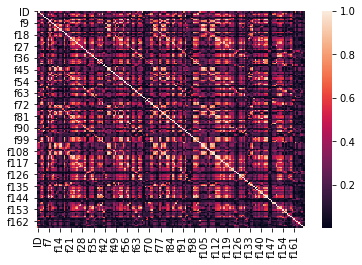

In [11]:
import seaborn as sns

sns.heatmap(corr)

## Cleaning the data

In [12]:
df.shape

(6598, 170)

In [13]:
# Here not all features are required.
# So we clean the data such that only features with correlation greater than 0.9 are retained.
# 

# Checking by retaining the lower triangle from corrleation heat map as shown above
# https://numpy.org/doc/stable/reference/generated/numpy.triu.html#numpy.triu
# https://numpy.org/doc/stable/reference/generated/numpy.tril.html#numpy.tril

low_triangle = corr.where(np.tril(np.ones(corr.shape), k=1).astype(np.bool))

In [14]:
drop = [col for col in low_triangle.columns if any(low_triangle[col] > 0.9)]

In [15]:
df1 = df.drop(columns = drop)

In [16]:
# On considering the lower matrix, all the features are dropped 

df1.shape

(6598, 2)

In [17]:
df1.head()

,molecule_name,conformation_name
0,MUSK-211,211_1+1
1,MUSK-211,211_1+10
2,MUSK-211,211_1+11
3,MUSK-211,211_1+12
4,MUSK-211,211_1+13


In [18]:
# Checking upper triangle for correlation matrix

up_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [19]:
drop_u = [col for col in up_triangle.columns if any(up_triangle[col] > 0.9)]

In [20]:
df2 = df.drop(columns = drop_u)

In [21]:
df2.shape

(6598, 111)

In [22]:
# Here we see that number of high correlation features are retained, and number of columns drop from 170 to 111.

df2.head(10)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f157,f158,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-244,-308,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-235,-59,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-238,-134,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-236,-60,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-236,-60,52,104,137,168,-60,-135,80,1
5,6,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,...,-239,-138,56,143,142,164,-67,-145,40,1
6,7,MUSK-211,211_1+15,47,-199,-106,28,-117,73,27,...,-238,-133,55,144,142,165,-68,-145,37,1
7,8,MUSK-211,211_1+16,41,-199,-101,22,-117,-6,26,...,-235,-59,50,100,135,169,-60,-135,81,1
8,9,MUSK-211,211_1+17,41,-199,-101,22,-117,-6,26,...,-235,-59,50,100,135,169,-60,-135,81,1
9,10,MUSK-211,211_1+18,47,-199,-106,28,-117,73,27,...,-238,-133,55,144,142,165,-68,-146,37,1


In [23]:
df['molecule_name'].value_counts()

NON-MUSK-j146    1044
NON-MUSK-252     1010
NON-MUSK-j147     911
NON-MUSK-f146     383
NON-MUSK-288      344
                 ... 
NON-MUSK-308        2
MUSK-300            2
NON-MUSK-358        2
NON-MUSK-j97        1
NON-MUSK-j96        1
Name: molecule_name, Length: 102, dtype: int64

In [24]:
# skipping over the categorical columns - molecule_name and conformation_name

from sklearn.model_selection import train_test_split

X = df2.iloc[:,3:-1]
y = df2.iloc[:,-1]

In [25]:
X.shape

(6598, 107)

In [26]:
y.shape

(6598,)

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=0)

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [29]:
X_train.shape

(5278, 107)

## Model 1 - ANN

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()
model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(0.001)
model.compile(loss='binary_crossentropy', optimizer= optimizer , metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                3456      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 4,129
Trainable params: 4,129
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=20, verbose=1)

Train on 4222 samples, validate on 1056 samples
Epoch 1/50
4222/4222 [==============================] - 2s 572us/sample - loss: 1.7085 - accuracy: 0.8034 - val_loss: 0.8483 - val_accuracy: 0.8419
Epoch 2/50
4222/4222 [==============================] - 1s 168us/sample - loss: 0.4011 - accuracy: 0.8558 - val_loss: 0.4671 - val_accuracy: 0.8589
Epoch 3/50
4222/4222 [==============================] - 1s 191us/sample - loss: 0.3409 - accuracy: 0.8697 - val_loss: 0.2985 - val_accuracy: 0.9025
Epoch 4/50
4222/4222 [==============================] - 1s 186us/sample - loss: 0.2473 - accuracy: 0.9060 - val_loss: 0.2158 - val_accuracy: 0.9271
Epoch 5/50
4222/4222 [==============================] - 1s 180us/sample - loss: 0.2055 - accuracy: 0.9275 - val_loss: 0.2215 - val_accuracy: 0.9271
Epoch 6/50
4222/4222 [==============================] - 1s 140us/sample - loss: 0.1904 - accuracy: 0.9320 - val_loss: 0.3644 - val_accuracy: 0.9214
Epoch 7/50
4222/4222 [==============================] - 1s 171us

In [35]:
model.evaluate(X_val, y_val)

1320/1320 [==============================] - 0s 48us/sample - loss: 0.4868 - accuracy: 0.9659


[0.4868181101067886, 0.96590906]

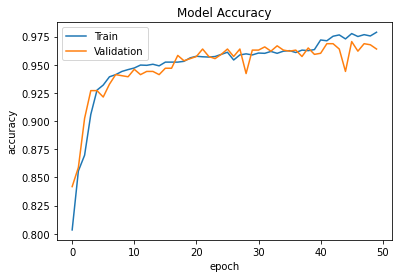

In [36]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

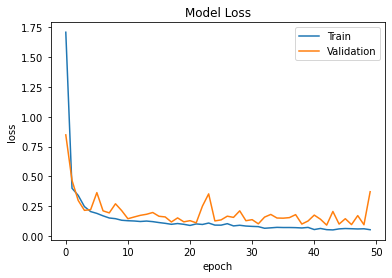

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [38]:
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5)

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
print(cm)

[[1099   21]
 [  24  176]]


In [40]:
print('The accuracy of our model: ',accuracy_score(y_val,y_pred))
print('The precision of our model: ',precision_score(y_val,y_pred))
print('The recall of our model: ',recall_score(y_val,y_pred))
print('The f1score of our model: ',f1_score(y_val,y_pred))

The accuracy of our model:  0.9659090909090909
The precision of our model:  0.8934010152284264
The recall of our model:  0.88
The f1score of our model:  0.8866498740554157


## Model 2 - CNN

In [41]:
X_train.shape

(5278, 107)

In [42]:
a=[1]*X_train.shape[0]
a

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [43]:
X_train["demo"]=a
X_train.shape

C:\Users\Mrunal\Anaconda3\envs\Tf\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(5278, 108)

In [44]:
b=[1]*X_val.shape[0]
X_val["demo"]=b
X_val.shape

C:\Users\Mrunal\Anaconda3\envs\Tf\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(1320, 108)

In [45]:
X_train_1 = X_train.values.reshape(X_train.shape[0],18,6,1)
X_val_1 = X_val.values.reshape(X_val.shape[0],18,6,1)

In [46]:
X_train_1.shape

(5278, 18, 6, 1)

In [47]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [48]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(18,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [50]:
history = model.fit(X_train_1,y_train,batch_size=128,epochs=15,validation_data=(X_val_1,y_val))

Train on 5278 samples, validate on 1320 samples
Epoch 1/15
5278/5278 [==============================] - 2s 310us/step - loss: 1.6157 - accuracy: 0.8249 - val_loss: 0.2286 - val_accuracy: 0.9091
Epoch 2/15
5278/5278 [==============================] - 1s 209us/step - loss: 0.3494 - accuracy: 0.8744 - val_loss: 0.1912 - val_accuracy: 0.9227
Epoch 3/15
5278/5278 [==============================] - 1s 206us/step - loss: 0.2635 - accuracy: 0.8975 - val_loss: 0.1822 - val_accuracy: 0.9295
Epoch 4/15
5278/5278 [==============================] - 1s 209us/step - loss: 0.2131 - accuracy: 0.9149 - val_loss: 0.1600 - val_accuracy: 0.9326
Epoch 5/15
5278/5278 [==============================] - 1s 209us/step - loss: 0.1889 - accuracy: 0.9261 - val_loss: 0.1753 - val_accuracy: 0.9303
Epoch 6/15
5278/5278 [==============================] - 1s 207us/step - loss: 0.1786 - accuracy: 0.9250 - val_loss: 0.1321 - val_accuracy: 0.9508
Epoch 7/15
5278/5278 [==============================] - 1s 219us/step - loss

In [51]:
score = model.evaluate(X_val_1,y_val,verbose=0)
print(score)

[0.09731331833384253, 0.9560605883598328]


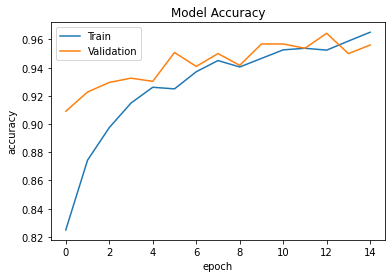

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

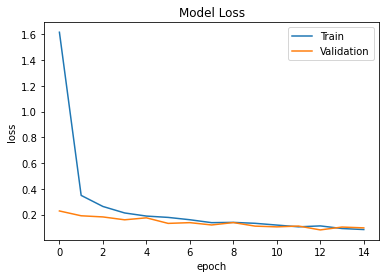

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [54]:
y_pred_1 = model.predict(X_val_1)
y_pred_1 = (y_pred_1 > 0.5)

In [55]:
cm_1 = confusion_matrix(y_val, y_pred_1)
print(cm_1)

[[1110   10]
 [  48  152]]


In [56]:
print('The accuracy of CNN model: ',accuracy_score(y_val,y_pred_1))
print('The precision of CNN model: ',precision_score(y_val,y_pred_1))
print('The recall of CNN model: ',recall_score(y_val,y_pred_1))
print('The f1score of CNN model: ',f1_score(y_val,y_pred_1))

The accuracy of CNN model:  0.956060606060606
The precision of CNN model:  0.9382716049382716
The recall of CNN model:  0.76
The f1score of CNN model:  0.8397790055248618
